In [1]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Data loading and exploring

In [2]:
train_data = pd.read_csv("Corona.csv")
test_data = pd.read_csv("Corona.csv")

In [3]:
train_data['Sentiment'] = train_data['Sentiment'].map({'Extremely Negative':'Negative','Negative':'Negative','Neutral':'Neutral','Positive':'Positive','Extremely Positive':'Positive'})

In [4]:
test_data['Sentiment'] = test_data['Sentiment'].map({'Extremely Negative':'Negative','Negative':'Negative','Neutral':'Neutral','Positive':'Positive','Extremely Positive':'Positive'})

In [5]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [6]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
len(train_data), len(test_data)

(3798, 3798)

In [8]:
labels = train_data["Sentiment"].unique()
labels

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [9]:
num_of_classes = len(labels)
num_of_classes

3

In [10]:
train_data["Sentiment"].value_counts()

Negative    1633
Positive    1546
Neutral      619
Name: Sentiment, dtype: int64

In [11]:
test_data["Sentiment"].value_counts()

Negative    1633
Positive    1546
Neutral      619
Name: Sentiment, dtype: int64

In [12]:
train_data["OriginalTweet"][0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1'

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

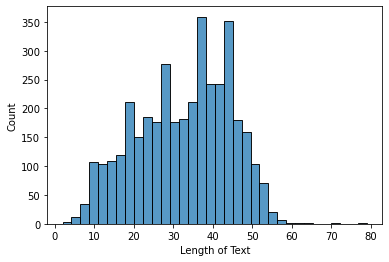

In [14]:
text_length = train_data["OriginalTweet"].apply(lambda x: len(x.split(' ')))
sns.histplot(text_length)
plt.xlabel('Length of Text')
plt.show()

# Data preprocessing

In [15]:
train_sentences = train_data["OriginalTweet"]
test_sentences = test_data["OriginalTweet"]
train_label = train_data["Sentiment"]
test_label = test_data["Sentiment"]

In [16]:
train_label[:5]

0    Negative
1    Positive
2    Positive
3    Negative
4     Neutral
Name: Sentiment, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_label)
test_labels_encoded = label_encoder.fit_transform(test_label)

In [18]:
train_labels_encoded[:5], test_labels_encoded[:5]

(array([0, 2, 2, 0, 1]), array([0, 2, 2, 0, 1]))

In [19]:
type(train_labels_encoded)

numpy.ndarray

In [20]:
train_sentences.shape, train_labels_encoded.shape

((3798,), (3798,))

In [21]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
sent_lens[:10]

[23, 30, 13, 37, 26, 35, 12, 28, 52, 37]

In [22]:
import numpy as np
avg_len = np.mean(sent_lens)
avg_len

32.909689310163245

In [23]:
min(sent_lens), max(sent_lens)

(2, 62)

In [24]:
out_len_seq = np.percentile(sent_lens, 95)
out_len_seq

50.0

# Text vectorization (tokenization)

In [25]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [26]:
text_vectorizer = TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None)

In [27]:
max_vocab_length = 50000
max_length = 50
text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    output_mode='int',
    output_sequence_length=max_length)

In [28]:
text_vectorizer.adapt(train_sentences)

In [29]:
import random
random_sentence = random.choice(train_sentences)
print(random_sentence)
print(text_vectorizer([random_sentence]))

Retailers across the board have upped their store cleaning regiments. https://t.co/qjlsxWdmnp #retail #coronavirus https://t.co/NoELxMLpbR
tf.Tensor(
[[  363   422     2  2016    25  5870    63    17   314  7413 10190    78
      9 10375     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]], shape=(1, 50), dtype=int64)


# Embedding

In [30]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length, 
                             output_dim=128, 
                             input_length=max_length,
                             embeddings_initializer='uniform')
embedding

In [31]:
print(embedding(text_vectorizer([random_sentence])))

tf.Tensor(
[[[ 0.03250999 -0.00115196  0.00916622 ...  0.03242815  0.00090892
    0.03679604]
  [ 0.00984152 -0.0097934  -0.03514441 ...  0.02745912  0.01469081
   -0.006913  ]
  [ 0.03333468  0.03771446 -0.04189136 ... -0.0408537  -0.03951389
   -0.00450935]
  ...
  [-0.04555335 -0.00214039  0.03202785 ... -0.02470992  0.02326032
    0.03311503]
  [-0.04555335 -0.00214039  0.03202785 ... -0.02470992  0.02326032
    0.03311503]
  [-0.04555335 -0.00214039  0.03202785 ... -0.02470992  0.02326032
    0.03311503]]], shape=(1, 50, 128), dtype=float32)


# Naive bayes

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [33]:
model_0 = Pipeline([
        ("tfidf", TfidfVectorizer()),
        ("clf", MultinomialNB()),
     ])

model_0.fit(train_sentences, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [34]:
baseline_score = model_0.score(test_sentences, test_label)

In [35]:
print(baseline_score*100)

80.04212743549236


# Conv1D model

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_of_classes, activation = "sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="dense_model")

In [37]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [38]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_label.to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_label.to_numpy().reshape(-1, 1))
train_labels_one_hot[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [39]:
test_labels_one_hot.shape

(3798, 3)

In [40]:
model_1_history = model_1.fit(np.array(train_sentences), 
                              train_labels_one_hot,
                              epochs=5,
                              validation_data=(np.array(test_sentences), test_labels_one_hot)) 

Epoch 1/5
119/119 [==============================] - 11s 85ms/step - loss: 1.0328 - accuracy: 0.4903 - val_loss: 0.9644 - val_accuracy: 0.5895
Epoch 2/5
119/119 [==============================] - 9s 79ms/step - loss: 0.9247 - accuracy: 0.6527 - val_loss: 0.8572 - val_accuracy: 0.6862
Epoch 3/5
119/119 [==============================] - 9s 80ms/step - loss: 0.8205 - accuracy: 0.7141 - val_loss: 0.7410 - val_accuracy: 0.7717
Epoch 4/5
119/119 [==============================] - 10s 83ms/step - loss: 0.7061 - accuracy: 0.7746 - val_loss: 0.6268 - val_accuracy: 0.8131
Epoch 5/5
119/119 [==============================] - 9s 79ms/step - loss: 0.5960 - accuracy: 0.8278 - val_loss: 0.5201 - val_accuracy: 0.8676
